In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../Scripts')
from measfilter import param_record, getData0,read_params
from gatesimu import Gateexp, output_gate, read_data, gate_circ, plotComparsion

# Parameters
interested_qubits = [1,2]
gate_num = 200
gate_type = 'X'

itr = 64
shots = 8192
file_address = 'T5/'
noise_file_address = 'Noise/'

# Collect U3-Gate Data
# param_record(backend, itr = itr, shots = shots, file_address = noise_file_address)
# for q in interested_qubits:
#     Gateexp(gate_num, gate_type, q, itr, backend, file_address =file_address)

Qubit  1
Given Lambdas [0.974      0.958      0.00525036]
Final Accepted Posterior Lambdas
M: 6.67819 Index: 34119 pi_obs = 22.5764 pi_Q(prior) = 3.38061
Accepted Number N: 5967, 0.149
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92333909 0.8851386  0.01043778]
Posterior Lambda Mode [0.97871636 0.88319688 0.00931146]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00169022
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


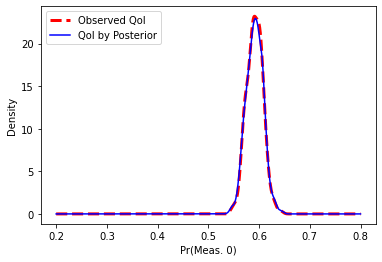

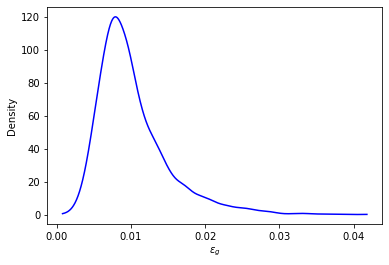

Qubit  2
Given Lambdas [0.977      0.964      0.00247759]
Final Accepted Posterior Lambdas
M: 12.9227 Index: 16505 pi_obs = 25.8632 pi_Q(prior) = 2.00137
Accepted Number N: 3085, 0.077
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92188864 0.89314379 0.00413445]
Posterior Lambda Mode [0.96967362 0.92509406 0.00574812]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00141275
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


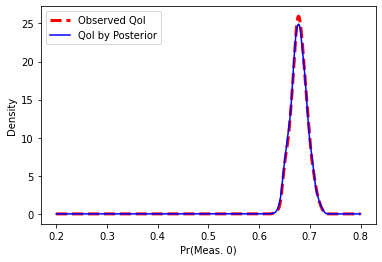

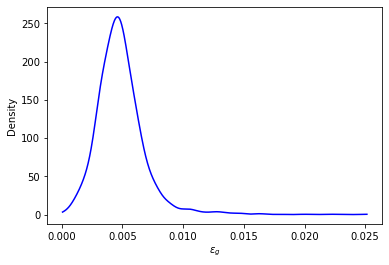

In [3]:
M = 40000
gate_sd = 0.01
meas_sd = 0.1
ideal_p0 = 1
info = {}

params = read_params(file_address = noise_file_address)
for q in interested_qubits:
    print('Qubit ',q)
    data = read_data(q, gate_type, gate_num, file_address = file_address)
    d = getData0(data, int(itr*shots/1024), q)
    _,post_lambdas = output_gate(d, q, M, params, gate_sd, meas_sd, gate_type, gate_num, file_address = file_address)
    info['Qubit' + str(q)] = post_lambdas

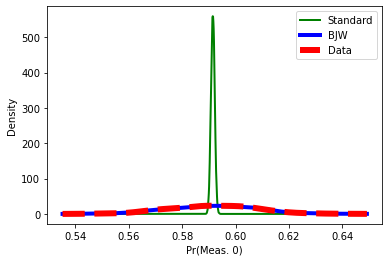

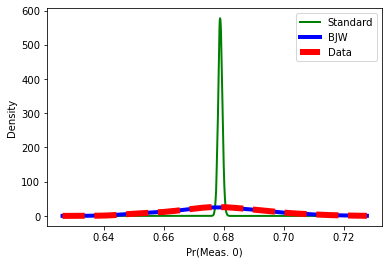

In [4]:
for q in interested_qubits:
    d = getData0(read_data(q, gate_type, gate_num, file_address = file_address), int(itr*shots/1024), q)
    plotComparsion(d, info['Qubit'+str(q)], q, file_address = file_address)